# Model for Calculation of CSI Value

1) Importing various library 

In [15]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

2) Import data of shape file as pandas data table and visualise 

In [16]:
data = gpd.read_file('Export_Output.shp')

In [17]:
# See data table head
data.head(5)

,OBJECTID,REACH_ID,GOID,NOID,NUOID,NDOID,CON_ID,CONTINENT,COUNTRY,BAS_ID,...,RDD,FLD,CSI,CSI_D,CSI_FF,CSI_FF1,CSI_FF2,CSI_FFID,Shape_Leng,geometry
0,1,40631851.0,3775711,3775711,None,3775993,5,Asia,India,2768696,...,2.362,0.0,99.88190,RDD,1,3,2,2100269,0.048928,"LINESTRING (79.10208 31.43750, 79.10208 31.418..."
1,2,40631852.0,3775712,3775712,None,3775993,5,Asia,India,2768696,...,0.000,0.0,100.00000,NAN,1,1,1,2102692,0.006250,"LINESTRING (79.10417 31.39375, 79.09792 31.39375)"
2,3,40632132.0,3775992,3775992,None,3776948,5,Asia,India,2768696,...,0.450,0.0,99.97750,RDD,1,1,1,2102587,0.022202,"LINESTRING (79.08542 31.40417, 79.08542 31.397..."
3,4,40632133.0,3775993,3775993,3775711_3775712,3776948,5,Asia,India,2768696,...,3.750,0.0,99.81250,RDD,1,3,2,2100269,0.010059,"LINESTRING (79.09792 31.39375, 79.09792 31.389..."
4,5,40632800.0,3776660,3776660,None,3778071,5,Asia,India,2768696,...,7.417,0.0,99.62915,RDD,1,1,1,2101934,0.018750,"LINESTRING (79.13125 31.38333, 79.13125 31.36458)"


In [18]:
data.shape

(163483, 40)

In [19]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 163483 entries, 0 to 163482
Data columns (total 40 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   OBJECTID    163483 non-null  int64   
 1   REACH_ID    163483 non-null  float64 
 2   GOID        163483 non-null  int64   
 3   NOID        163483 non-null  int64   
 4   NUOID       79707 non-null   object  
 5   NDOID       163483 non-null  int64   
 6   CON_ID      163483 non-null  int64   
 7   CONTINENT   163483 non-null  object  
 8   COUNTRY     163483 non-null  object  
 9   BAS_ID      163483 non-null  int64   
 10  BAS_NAME    163483 non-null  object  
 11  LENGTH_KM   163483 non-null  float64 
 12  VOLUME_TCM  163483 non-null  float64 
 13  UPLAND_SKM  163483 non-null  float64 
 14  DIS_AV_CMS  163483 non-null  float64 
 15  RIV_ORD     163483 non-null  int64   
 16  ERO_YLD_TO  163483 non-null  float64 
 17  HYFALL      163483 non-null  int64   
 18  BB_ID       1634

In [20]:
# Data statastics
data.describe()

,OBJECTID,REACH_ID,GOID,NOID,NDOID,CON_ID,BAS_ID,LENGTH_KM,VOLUME_TCM,UPLAND_SKM,...,USE,URB,RDD,FLD,CSI,CSI_FF,CSI_FF1,CSI_FF2,CSI_FFID,Shape_Leng
count,163483.000000,1.634830e+05,1.634830e+05,1.634830e+05,1.634830e+05,163483.0,163483.0,163483.000000,163483.000000,1.634830e+05,...,163483.000000,163483.000000,163483.000000,163483.000000,163483.000000,163483.000000,163483.000000,163483.000000,1.634830e+05,163483.000000
mean,81742.000000,4.085281e+07,3.996674e+06,3.996674e+06,3.996851e+06,5.0,2768696.0,2.914877,301.281259,5.099639e+03,...,0.805547,0.264567,1.760889,39.993954,98.893338,0.966247,1.116024,1.091759,2.071957e+06,0.027737
std,47193.621366,1.116450e+05,1.116450e+05,1.116450e+05,1.118935e+05,0.0,0.0,2.835449,3356.342130,5.230478e+04,...,4.409482,3.695156,2.633406,44.755348,6.036212,0.180593,0.467534,0.388373,2.467295e+04,0.026948
min,1.000000,4.063185e+07,3.775711e+06,3.775711e+06,0.000000e+00,5.0,2768696.0,0.397000,0.008000,7.550000e-01,...,0.000000,0.000000,0.000000,0.000000,12.923250,0.000000,1.000000,1.000000,2.031498e+06,0.004167
25%,40871.500000,4.076236e+07,3.906218e+06,3.906218e+06,3.906348e+06,5.0,2768696.0,1.083000,1.056000,5.921000e+00,...,0.000000,0.000000,0.000000,0.000000,99.791200,1.000000,1.000000,1.000000,2.050515e+06,0.010417
50%,81742.000000,4.084292e+07,3.986781e+06,3.986781e+06,3.987301e+06,5.0,2768696.0,2.018000,4.217000,1.952600e+01,...,0.000000,0.000000,0.418000,10.606000,99.935950,1.000000,1.000000,1.000000,2.071313e+06,0.018898
75%,122612.500000,4.094721e+07,4.091072e+06,4.091072e+06,4.091072e+06,5.0,2768696.0,3.704000,21.165500,1.115855e+02,...,0.000000,0.000000,2.714000,100.000000,100.000000,1.000000,1.000000,1.000000,2.093050e+06,0.035059
max,163483.000000,4.110510e+07,4.248959e+06,4.248959e+06,4.247392e+06,5.0,2768696.0,73.224000,206678.557000,1.574223e+06,...,100.000000,100.000000,25.400000,100.000000,100.000000,1.000000,3.000000,3.000000,2.115662e+06,0.708608


3) Drop the unnecessary columns from data table

In [21]:
data.drop(['OBJECTID','REACH_ID','GOID','NOID','NUOID','NDOID','CON_ID','CON_ID','CONTINENT','COUNTRY','BAS_ID','BAS_NAME','BB_ID','BB_NAME','BAS_NAME','BB_OCEAN','FLD','CSI_D','CSI_FF','CSI_FF1','CSI_FF2','CSI_FFID','Shape_Leng','geometry'], inplace=True, axis=1)

4) Check the varience of all features for feature selection and drop features with low varience 

In [22]:
data.var()

LENGTH_KM     8.039771e+00
VOLUME_TCM    1.126503e+07
UPLAND_SKM    2.735790e+09
DIS_AV_CMS    1.523708e+06
RIV_ORD       1.016255e+00
ERO_YLD_TO    3.205083e+08
HYFALL        7.951313e-05
BB_LEN_KM     1.381912e+05
BB_DIS_ORD    1.389010e+00
BB_VOL_TCM    3.425730e+12
INC           2.428507e-01
DOF           1.391864e+02
DOR           3.120224e+01
SED           6.339814e+01
USE           1.944353e+01
URB           1.365418e+01
RDD           6.934829e+00
CSI           3.643585e+01
dtype: float64

In [23]:
data.drop(columns = ['HYFALL','INC'], inplace=True, axis=1)

5) Check the correlation of all features w.r.t. CSI for feature selection and drop features with low correlation

In [24]:
corr_matrix = data.corr()
corr_matrix['CSI'].sort_values(ascending=False)

CSI           1.000000
RIV_ORD       0.224277
BB_DIS_ORD    0.216811
RDD          -0.005572
ERO_YLD_TO   -0.056570
URB          -0.059784
LENGTH_KM    -0.103036
BB_VOL_TCM   -0.127995
DIS_AV_CMS   -0.142241
VOLUME_TCM   -0.196684
BB_LEN_KM    -0.238625
UPLAND_SKM   -0.240280
USE          -0.520912
DOR          -0.803590
SED          -0.899584
DOF          -0.906467
Name: CSI, dtype: float64

In [25]:
# Dropping features with low correlation with CSI
data.drop(columns = ['RDD','URB','ERO_YLD_TO','LENGTH_KM','DIS_AV_CMS','VOLUME_TCM','UPLAND_SKM'], inplace=True, axis=1)

6) Add new feature effective of two features combined and drop existing two

In [26]:
data['Area'] = data['BB_VOL_TCM']/data['BB_LEN_KM']

In [28]:
data.drop(columns = ['BB_VOL_TCM','BB_LEN_KM'],inplace = True, axis = 1)

7) Drop SED index due to non availabitity of whole data

In [29]:
data.drop(columns = 'SED',inplace = True, axis = 1)

8) Seperate dependent and independent variables

array([[<AxesSubplot:xlabel='CSI', ylabel='CSI'>,
        <AxesSubplot:xlabel='DOF', ylabel='CSI'>,
        <AxesSubplot:xlabel='DOR', ylabel='CSI'>,
        <AxesSubplot:xlabel='USE', ylabel='CSI'>,
        <AxesSubplot:xlabel='RIV_ORD', ylabel='CSI'>,
        <AxesSubplot:xlabel='BB_DIS_ORD', ylabel='CSI'>,
        <AxesSubplot:xlabel='Area', ylabel='CSI'>],
       [<AxesSubplot:xlabel='CSI', ylabel='DOF'>,
        <AxesSubplot:xlabel='DOF', ylabel='DOF'>,
        <AxesSubplot:xlabel='DOR', ylabel='DOF'>,
        <AxesSubplot:xlabel='USE', ylabel='DOF'>,
        <AxesSubplot:xlabel='RIV_ORD', ylabel='DOF'>,
        <AxesSubplot:xlabel='BB_DIS_ORD', ylabel='DOF'>,
        <AxesSubplot:xlabel='Area', ylabel='DOF'>],
       [<AxesSubplot:xlabel='CSI', ylabel='DOR'>,
        <AxesSubplot:xlabel='DOF', ylabel='DOR'>,
        <AxesSubplot:xlabel='DOR', ylabel='DOR'>,
        <AxesSubplot:xlabel='USE', ylabel='DOR'>,
        <AxesSubplot:xlabel='RIV_ORD', ylabel='DOR'>,
        <AxesSubplot

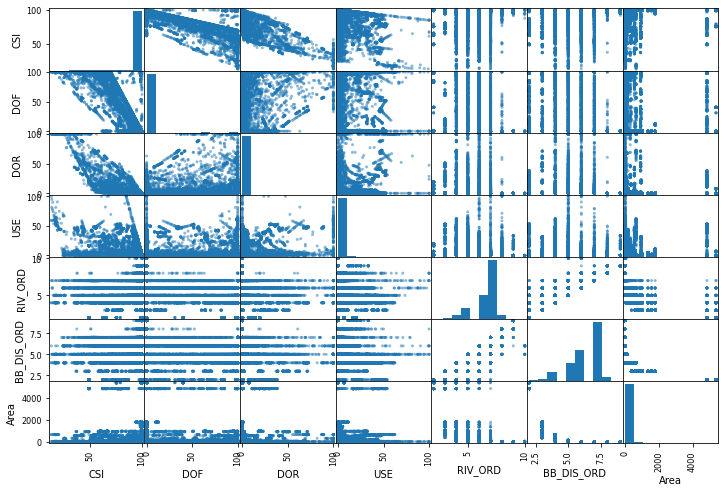

In [31]:
#Visualise data in scatter plot
from pandas.plotting import scatter_matrix
attributes = ["CSI", "DOF", "DOR", "USE","RIV_ORD","BB_DIS_ORD","Area"]
scatter_matrix(data[attributes], figsize = (12,8))

In [30]:
X = data.drop(columns = 'CSI')
y = data.CSI

In [32]:
# Selecting the model and seperating training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)

9) Select the suitable model and fit data for prediction

In [33]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [34]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [35]:
#Make predictions by using model fitted to trainind data
predictions = model.predict(X_test)

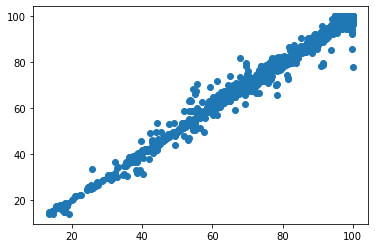

In [37]:
# Scatter plot for visualization of testing and predicted data
plt.scatter(y_test,predictions)

C:\Users\dhira\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


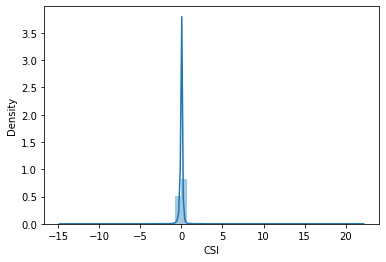

In [38]:
sns.distplot((y_test-predictions),bins=50);

10) Check the accuracy of model 

In [39]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2_value: ' + str(r2_score(y_test,predictions)))

MAE: 0.1351210258926577
MSE: 0.16327248838775413
RMSE: 0.40406990532301973
r2_value: 0.9957472199851255


NOTE: Even though we havn't considered the major pressure indicator 'SED' in the analysis of CSI value, still the model is giving most accurate results as Root Mean Squared Error value is nearest to 0 and the R squared value is close to 1.  

# Thank You!